In [1]:
import seaborn as sns

In [2]:
sns.__version__

'0.9.0'

In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(1234)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
content=pd.read_csv('household_power_consumption.txt',delimiter=';')

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
content.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
content=content.drop(['Global_reactive_power'],axis=1)

In [8]:
content=content.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [9]:
import seaborn as sns

In [10]:
content.head(2)

,Date,Time,Global_active_power,Voltage,Global_intensity
0,16/12/2006,17:24:00,4.216,234.840,18.400
1,16/12/2006,17:25:00,5.360,233.630,23.000


In [11]:
content.dtypes

Date                   object
Time                   object
Global_active_power    object
Voltage                object
Global_intensity       object
dtype: object

In [12]:
df_content=content

In [13]:
df_content['Date']= pd.to_datetime(df_content['Date'])

In [14]:
df_content['Time'] = pd.to_datetime(df_content['Time'])

In [15]:
df_content[['Global_active_power','Voltage','Global_intensity']] = df_content[['Global_active_power','Voltage','Global_intensity']].apply(pd.to_numeric, errors='coerce')

In [16]:
df_content.dtypes

Date                   datetime64[ns]
Time                   datetime64[ns]
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
dtype: object

In [17]:
import datetime as dt

In [18]:
df_content['year'] = df_content['Date'].dt.year

In [19]:
df_content.dtypes

Date                   datetime64[ns]
Time                   datetime64[ns]
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
year                            int64
dtype: object

In [20]:
df_content['year'] = pd.to_datetime(df_content['Date']).dt.year

In [21]:
df_content.head(3)

,Date,Time,Global_active_power,Voltage,Global_intensity,year
0,2006-12-16,2018-10-16 17:24:00,4.216,234.84,18.4,2006
1,2006-12-16,2018-10-16 17:25:00,5.360,233.63,23.0,2006
2,2006-12-16,2018-10-16 17:26:00,5.374,233.29,23.0,2006


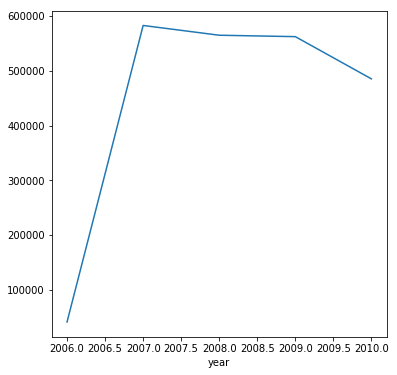

In [22]:
plt.figure(figsize=(6,6))
df_content.groupby('year')['Global_active_power'].sum().plot()

In [23]:
from datetime import datetime 

In [24]:
df_content['month'] = pd.to_datetime(df_content['Date']).dt.month

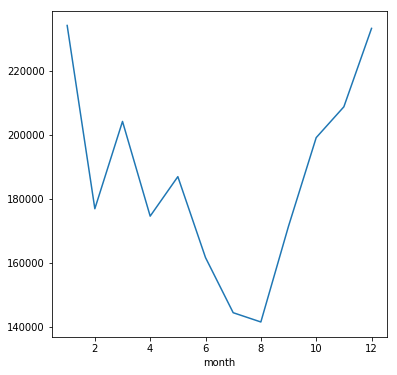

In [25]:
plt.figure(figsize=(6,6))
df_content.groupby('month')['Global_active_power'].sum().plot()


In [26]:
df_content.head(2)

,Date,Time,Global_active_power,Voltage,Global_intensity,year,month
0,2006-12-16,2018-10-16 17:24:00,4.216,234.84,18.4,2006,12
1,2006-12-16,2018-10-16 17:25:00,5.360,233.63,23.0,2006,12


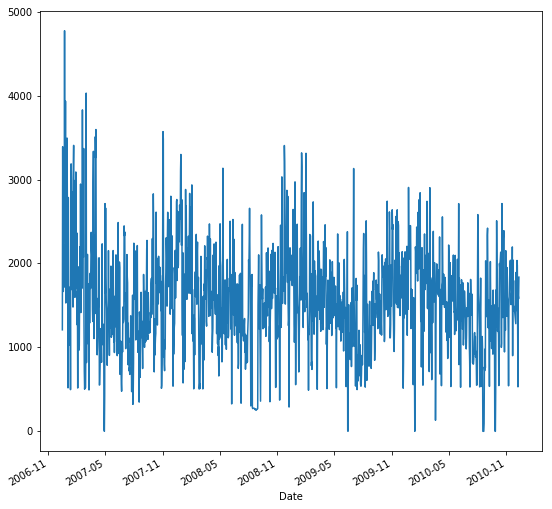

In [27]:
plt.figure(figsize=(9,9))
df_content.groupby('Date')['Global_active_power'].sum().plot()

In [28]:
df_content.dtypes

Date                   datetime64[ns]
Time                   datetime64[ns]
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
year                            int64
month                           int64
dtype: object

In [55]:
df_content = df_content.drop('Time',axis=1)

In [68]:
df_content['year_month'] = df_content['Date'].dt.year.map(str) + ' ' + df_content['Date'].dt.month.map(str)

In [69]:
df_content.dtypes

Date                   datetime64[ns]
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
year                            int64
month                           int64
year_month                     object
dtype: object

In [72]:
df_content['year_month'] = pd.to_datetime(df_content['year_month'])

In [79]:
df_content.dtypes

Date                   datetime64[ns]
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
year                            int64
month                           int64
year_month             datetime64[ns]
dtype: object

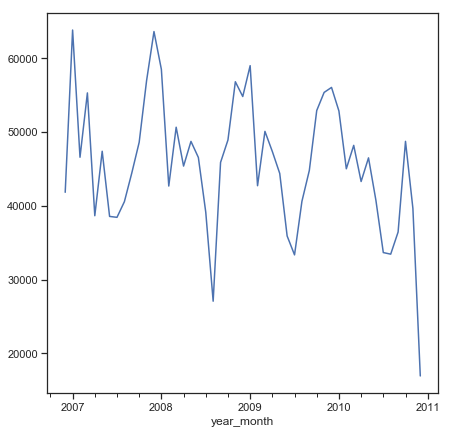

In [81]:
plt.figure(figsize=(7,7))
df_content.groupby('year_month')['Global_active_power'].sum().plot()

In [83]:
df_new = df_content.groupby('year_month')['Global_active_power'].sum()

In [85]:
df_new = pd.DataFrame(df_new)

In [91]:
df_new.head(3)

,Global_active_power
year_month,
2006-12-01,41813.282
2007-01-01,63795.714
2007-02-01,46563.028


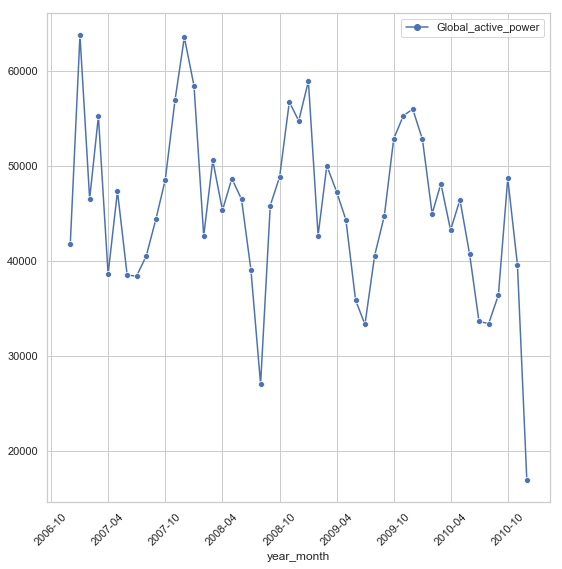

In [97]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
sns.lineplot(data=df_new, markers=True, legend='full', color="coral")
plt.xticks(rotation=45)
plt.legend()

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


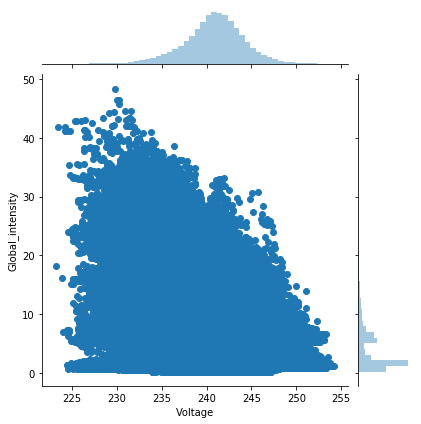

In [29]:
sns.jointplot(x='Voltage', y='Global_intensity', data=df_content)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


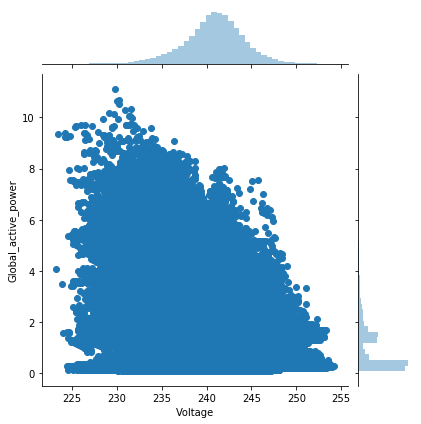

In [30]:
sns.jointplot(x='Voltage', y='Global_active_power', data=df_content)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


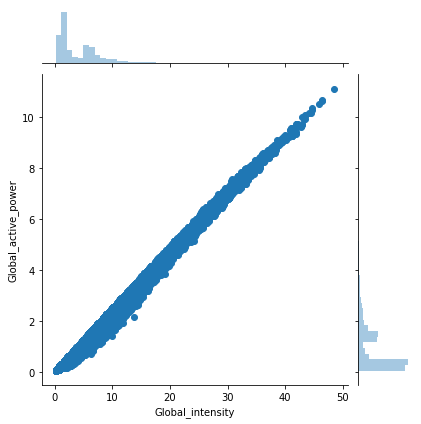

In [31]:
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df_content)

In [32]:
df_content[['Global_active_power','Global_intensity','Voltage']].head(3)

,Global_active_power,Global_intensity,Voltage
0,4.216,18.4,234.84
1,5.360,23.0,233.63
2,5.374,23.0,233.29


In [33]:
df_content.head(3)

,Date,Time,Global_active_power,Voltage,Global_intensity,year,month
0,2006-12-16,2018-10-16 17:24:00,4.216,234.84,18.4,2006,12
1,2006-12-16,2018-10-16 17:25:00,5.360,233.63,23.0,2006,12
2,2006-12-16,2018-10-16 17:26:00,5.374,233.29,23.0,2006,12


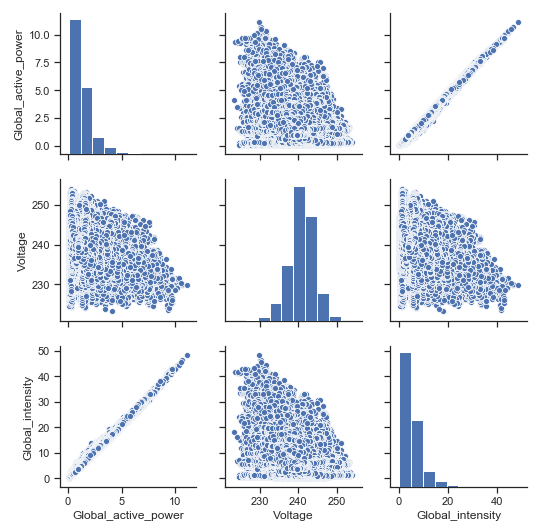

In [47]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(df_content[['Global_active_power','Voltage','Global_intensity']])

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj

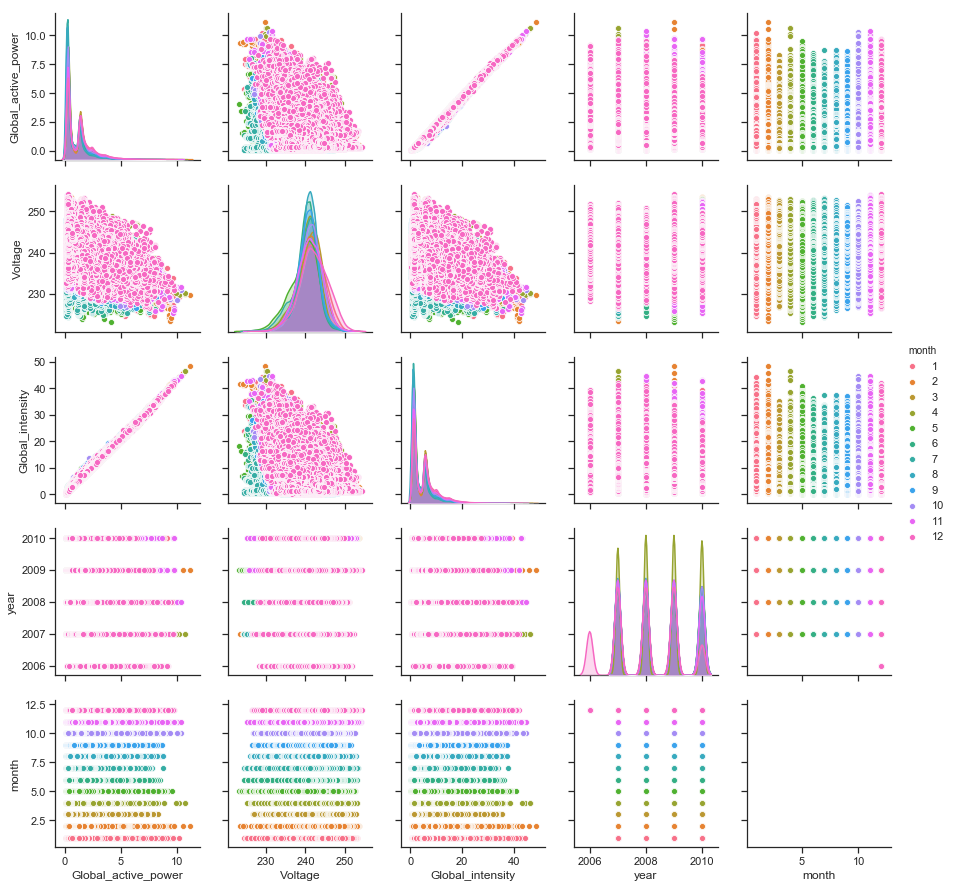

In [49]:
sns.pairplot(df_content, hue="month")

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


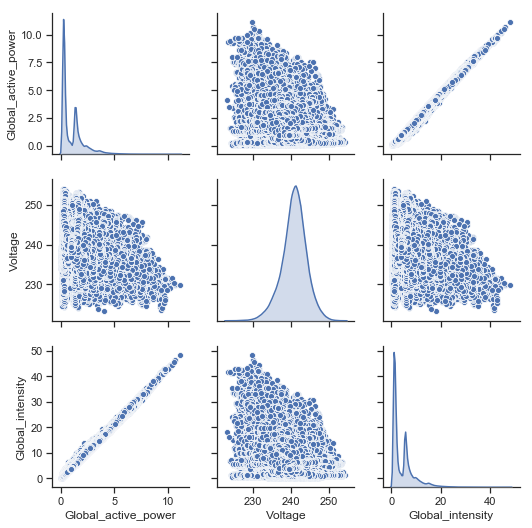

In [50]:
sns.pairplot(df_content[['Global_active_power','Voltage','Global_intensity']], diag_kind="kde")

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj

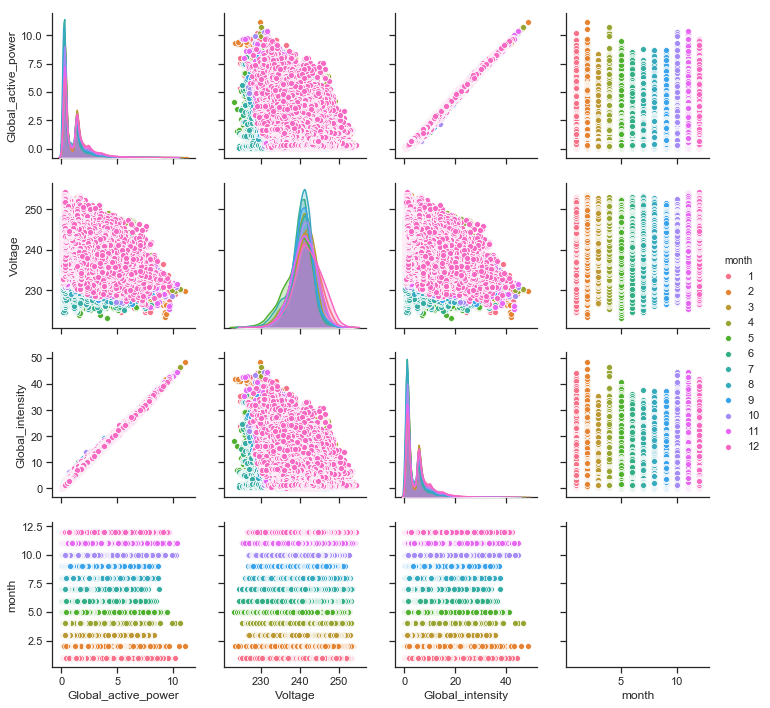

In [52]:
sns.pairplot(df_content[['Global_active_power','Voltage','Global_intensity','month']], hue="month",palette="husl")

In [99]:
sns.set_style('darkgrid')

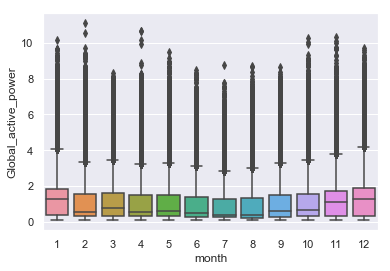

In [100]:
sns.boxplot(x=df_content["month"], y=df_content['Global_active_power'])

In [101]:
df_content['Global_active_power'].describe()

count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

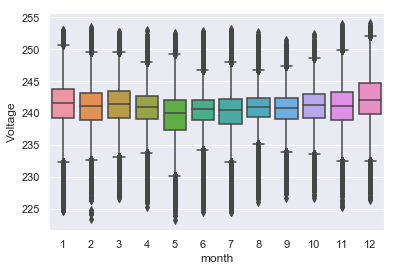

In [102]:
sns.boxplot(x=df_content["month"], y=df_content['Voltage'])

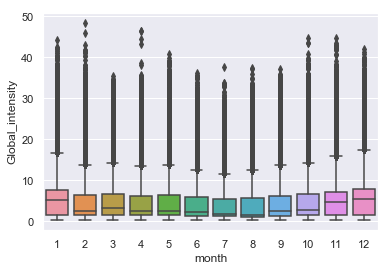

In [103]:
sns.boxplot(x=df_content["month"], y=df_content['Global_intensity'])

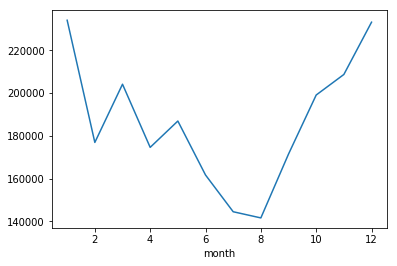

In [38]:
df_content.groupby('month')['Global_active_power'].sum().plot()

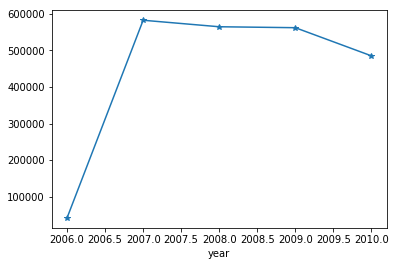

In [39]:
df_content.groupby('year')['Global_active_power'].sum().plot(marker="*")

In [40]:
df_content.isnull().any()

Date                   False
Time                   False
Global_active_power     True
Voltage                 True
Global_intensity        True
year                   False
month                  False
dtype: bool

In [41]:
df_content.isna().sum()

Date                       0
Time                       0
Global_active_power    25979
Voltage                25979
Global_intensity       25979
year                       0
month                      0
dtype: int64

In [42]:
df_content = df_content.dropna()

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


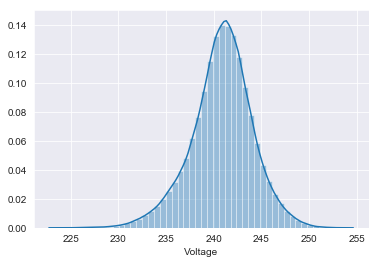

In [43]:
sns.set_style("darkgrid")
sns.distplot(df_content['Voltage'])


C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


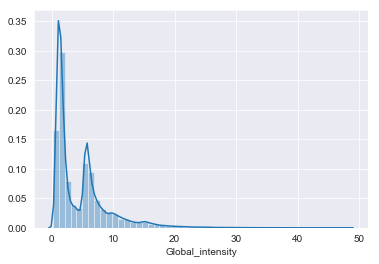

In [44]:
sns.distplot(df_content['Global_intensity'])

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


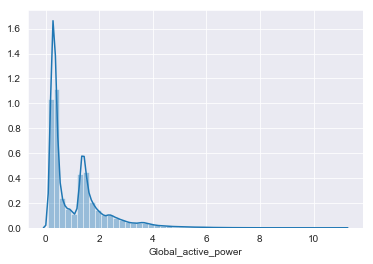

In [45]:
sns.set_style("darkgrid")
sns.distplot(df_content['Global_active_power'])
